In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

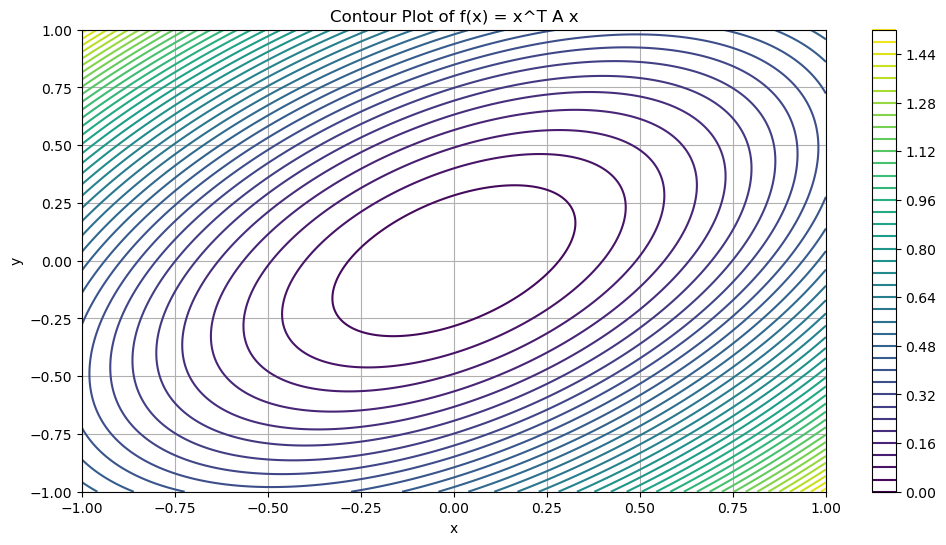

In [ ]:
# Define the quadratic form function
def f(x, y):
    A = np.array([[0.5, -1/(4)], [-1/(4), 0.5]])
    return (A[0,0]*x**2 + 2*A[0,1]*x*y + A[1,1]*y**2)

# Create a grid of x and y values
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot contour lines
plt.figure(figsize=(12,6))
contour = plt.contour(X, Y, Z, levels=40, cmap='viridis')
plt.colorbar(contour)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour Plot of f(x) = x^T A x")
plt.grid(True)
plt.show()

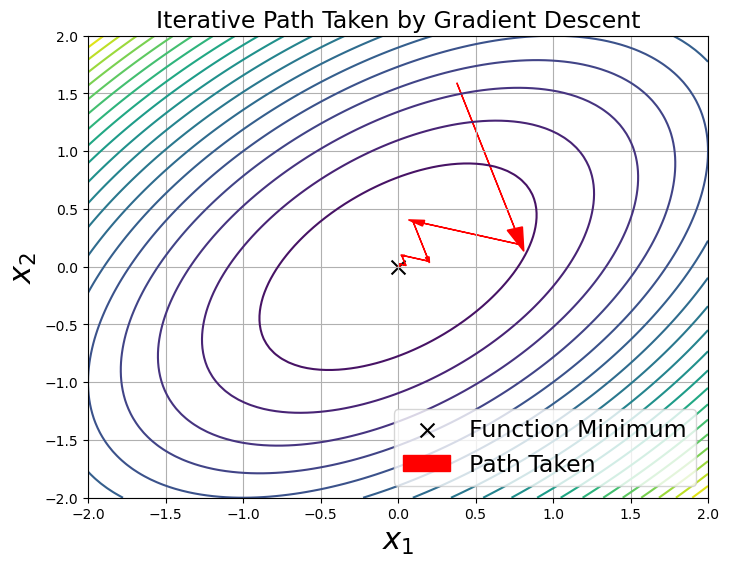

In [186]:
# Define the quadratic form function
A = np.array([[0.5, -1/4], [-1/4, 0.5]])

def f(x, y):
    A = np.array([[0.5, -1/4], [-1/4, 0.5]])
    return A[0,0]*x**2 + 2*A[0,1]*x*y + A[1,1]*y**2

# Compute the gradient of f
def gradient(x, y):
    A = np.array([[0.5, -1/4], [-1/4, 0.5]])
    grad_x = 2*A[0,0]*x + 2*A[0,1]*y
    grad_y = 2*A[1,0]*x + 2*A[1,1]*y
    return np.array([grad_x, grad_y])

# Gradient descent visualization
def plot_gradient_descent(start, step_size, iterations):
    x_vals, y_vals = [start[0]], [start[1]]
    x, y = start
    for _ in range(iterations):
        grad = gradient(x, y)
        x_new = x - step_size * grad[0]
        y_new = y - step_size * grad[1]
        x_vals.append(x_new)
        y_vals.append(y_new)
        x, y = x_new, y_new
    
    return x_vals, y_vals

# Create a grid of x and y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot contour lines
plt.figure(figsize=(8,6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel(r'$x_1$', fontsize=22)
plt.ylabel(r'$x_2$', fontsize=22)
plt.title("Iterative Path Taken by Gradient Descent", fontsize=17)
plt.grid(True)

# Parameters for gradient descent
start_point = np.array([0.38, 1.59])  # Initial point
step_size = 1  # Scaling factor
iterations = 10  # Number of steps

# Compute descent path
plt.scatter(0, 0, color='black', marker='x', s=100, label='Function Minimum')
x_path, y_path = plot_gradient_descent(start_point, step_size, iterations)
for i in range(len(x_path) - 1):
    dx = x_path[i+1] - x_path[i]
    dy = y_path[i+1] - y_path[i]
    arrow_length = np.hypot(dx, dy)
    end_x = x_path[i+1] - (dx / arrow_length) * 0.1 * arrow_length
    end_y = y_path[i+1] - (dy / arrow_length) * 0.1 * arrow_length
    plt.arrow(x_path[i], y_path[i], end_x - x_path[i], end_y - y_path[i], 
              head_width=0.07 * arrow_length, head_length=0.14 * arrow_length, fc='red', ec='red',  label='Path Taken' if i == 0 else "")
plt.legend(fontsize=17, loc = "lower right")
plt.show()

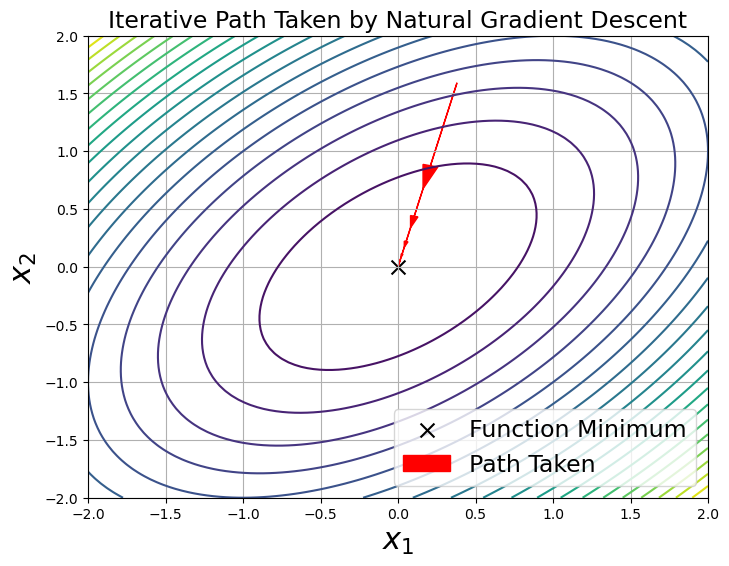

In [189]:
# Define the quadratic form function
A = np.array([[0.5, -1/4], [-1/4, 0.5]])

def f(x, y):
    A = np.array([[0.5, -1/4], [-1/4, 0.5]])
    return A[0,0]*x**2 + 2*A[0,1]*x*y + A[1,1]*y**2

# Compute the gradient of f
def nat_gradient(x, y):
    A = np.array([[0.5, -1/4], [-1/4, 0.5]])
    grad_x = 2*A[0,0]*x + 2*A[0,1]*y
    grad_y = 2*A[1,0]*x + 2*A[1,1]*y
    return np.matmul(np.linalg.inv(A),np.array([grad_x, grad_y]))

# Gradient descent visualization
def plot_gradient_descent(start, step_size, iterations):
    x_vals, y_vals = [start[0]], [start[1]]
    x, y = start
    for _ in range(iterations):
        grad = nat_gradient(x, y)
        x_new = x - step_size * grad[0]
        y_new = y - step_size * grad[1]
        x_vals.append(x_new)
        y_vals.append(y_new)
        x, y = x_new, y_new
    
    return x_vals, y_vals

# Create a grid of x and y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot contour lines
plt.figure(figsize=(8,6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel(r'$x_1$', fontsize=22)
plt.ylabel(r'$x_2$', fontsize=22)
plt.title("Iterative Path Taken by Natural Gradient Descent", fontsize=17)
plt.grid(True)

# Parameters for gradient descent
start_point = np.array([0.38, 1.59])  # Initial point
step_size = 0.25  # Scaling factor
iterations = 8  # Number of steps

# Compute descent path
plt.scatter(0, 0, color='black', marker='x', s=100, label='Function Minimum')
x_path, y_path = plot_gradient_descent(start_point, step_size, iterations)
for i in range(len(x_path) - 1):
    dx = x_path[i+1] - x_path[i]
    dy = y_path[i+1] - y_path[i]
    arrow_length = np.hypot(dx, dy)
    end_x = x_path[i+1] - (dx / arrow_length) * 0.1 * arrow_length
    end_y = y_path[i+1] - (dy / arrow_length) * 0.1 * arrow_length
    plt.arrow(x_path[i], y_path[i], end_x - x_path[i], end_y - y_path[i], 
              head_width=0.12 * arrow_length, head_length=0.25 * arrow_length, fc='red', ec='red', label='Path Taken' if i == 0 else "")
plt.legend(fontsize=17, loc = "lower right")
plt.show()

In [81]:
np.linalg.inv(A)

array([[2.66666667, 1.33333333],
       [1.33333333, 2.66666667]])